In [105]:
# Import Pandas, Matplotlib, and Seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Dataset
df = pd.read_csv('Airline_customer_satisfaction.csv')
df.head()

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0


In [106]:
# Check Number of Rows and Columns
print("Dataset shape:", df.shape)

# Check Column Names
print("Columns in the dataset:")
print(df.columns.tolist())

Dataset shape: (129880, 22)
Columns in the dataset:
['satisfaction', 'Customer Type', 'Age', 'Type of Travel', 'Class', 'Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient', 'Food and drink', 'Gate location', 'Inflight wifi service', 'Inflight entertainment', 'Online support', 'Ease of Online booking', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']


In [107]:
# Look for Missing Values

df.isnull().sum()

satisfaction                           0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

In [108]:
# Fill in Missing "Arrival Delay in Minutes" Values, with the Median Delay

median_delay = df['Arrival Delay in Minutes'].median()
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].fillna(median_delay)

In [109]:
# Convert Satisfaction to Numerical (binary, 1-> satisfied, 0 -> dissatisfied)

df['satisfaction_num'] = df['satisfaction'].map({
    'satisfied': 1,
    'dissatisfied': 0,
})

In [110]:
# Check to see if "satisfaction_num" is added

df.head()

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction_num
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,3,3,0,3,5,3,2,0,0.0,1
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,3,4,4,4,2,3,2,310,305.0,1
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,3,3,4,4,4,2,0,0.0,1
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,1,1,0,1,4,1,3,0,0.0,1
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,2,2,0,2,4,2,5,0,0.0,1


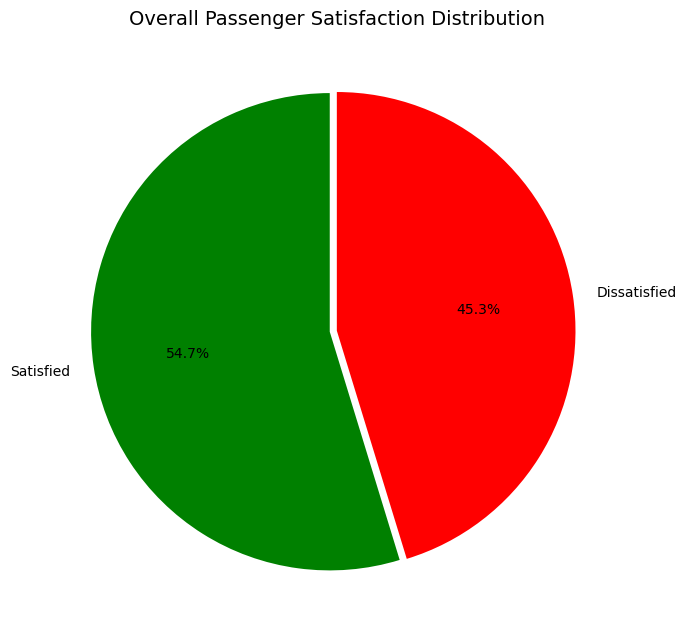

In [111]:
# Graph Pie Chart of Satisfied VS Dissatisfied

# Count Satisfied vs Dissatisfied
satisfaction_counts = df['satisfaction_num'].value_counts()

# Labels for Pie Chart
labels = ['Satisfied', 'Dissatisfied']

# Graph Chart
plt.figure(figsize = (7,7))
plt.pie(
    satisfaction_counts,
    labels = labels,
    autopct = '%1.1f%%',     
    startangle = 90,          
    colors = ['Green', 'Red'],  
    explode = [0.03, 0]       
)
plt.title("Overall Passenger Satisfaction Distribution", fontsize=14)
plt.tight_layout()
plt.show()

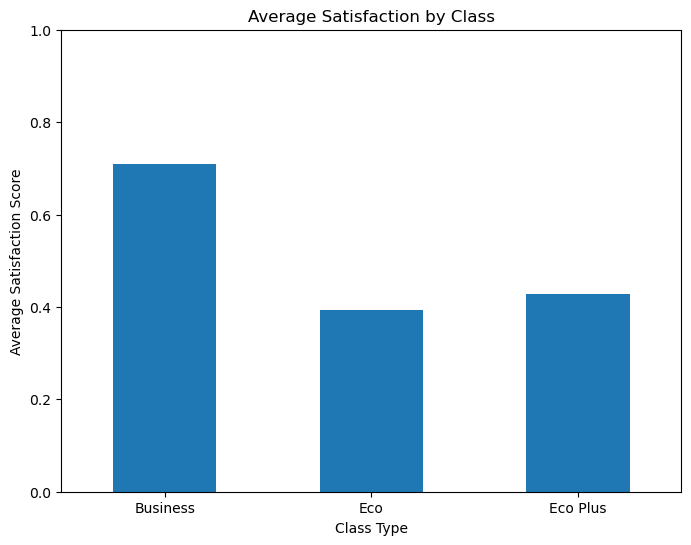

In [112]:
# Graph Satisfaction by Class

plt.figure(figsize = (8,6))
df.groupby('Class')['satisfaction_num'].mean().plot(kind = 'bar')
plt.title('Average Satisfaction by Class')
plt.xlabel('Class Type')
plt.ylabel('Average Satisfaction Score')
plt.xticks(rotation = 0)
plt.ylim(0,1)
plt.show()

In [113]:
# Create Separate Dataframes for Each Class Type (Economy, Economy-Plus, Business)

# Economy Class
df_eco = df[df['Class'] == 'Eco']
print("Economy shape:", df_eco.shape)

Economy shape: (58309, 23)


In [114]:
# Economy-Plus Class (Eco-plus Class)

df_ecoplus = df[df['Class'] == 'Eco Plus']
print("Economy Plus (Eco-Plus) shape:", df_ecoplus.shape)

Economy Plus (Eco-Plus) shape: (9411, 23)


In [115]:
# Business Class

df_business = df[df['Class'] == 'Business']
print("Business shape:", df_business.shape)

Business shape: (62160, 23)


In [116]:
# List of Customer Experience Rating Columns

operational_cols = [
    'Seat comfort',
    'Departure/Arrival time convenient',
    'Food and drink',
    'Gate location',
    'Inflight wifi service',
    'Inflight entertainment',
    'Online support',
    'Ease of Online booking',
    'On-board service',
    'Leg room service',
    'Baggage handling',
    'Checkin service',
    'Cleanliness',
    'Online boarding'
]

## Correlation of Factors with Satisfaction - Overall

In [117]:
# Correlation matrix for all operational factors + satisfaction

corr_matrix = df[operational_cols + ['satisfaction_num']].corr()

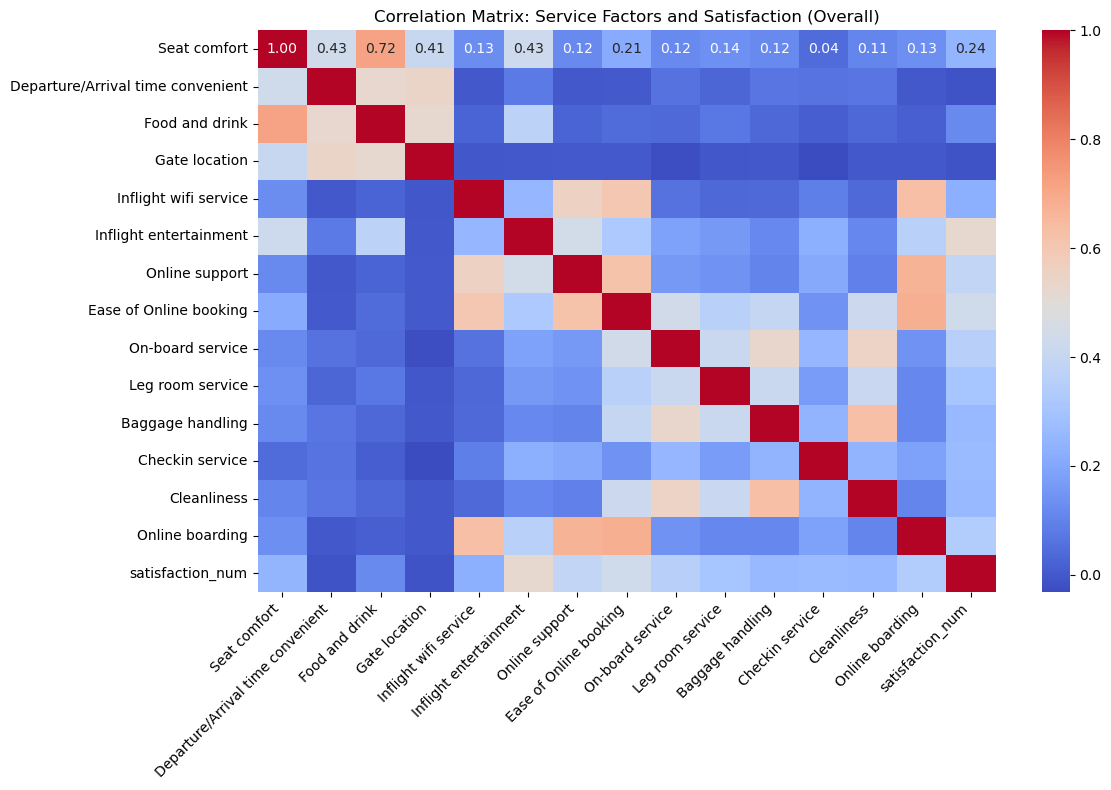

In [118]:
# Plot Overall Correlation Matrix

plt.figure(figsize = (12, 8))
sns.heatmap(corr_matrix,
            annot = True,
            fmt = ".2f",
            cmap = 'coolwarm')
plt.title("Correlation Matrix: Service Factors and Satisfaction (Overall)")
plt.xticks(rotation = 45, ha = "right")
plt.yticks(rotation = 0)
plt.tight_layout()
plt.show()

In [119]:
# Calculate Correlation Between each Factor and 'satisfaction_num'

corr_values = (
    df[operational_cols + ['satisfaction_num']]
    .corr()['satisfaction_num']
    # Remove the correlation of satisfaction with itself
    .drop('satisfaction_num')
)

# Sort Correlation Values from Highest to Lowest
corr_values = corr_values.sort_values(ascending = False)

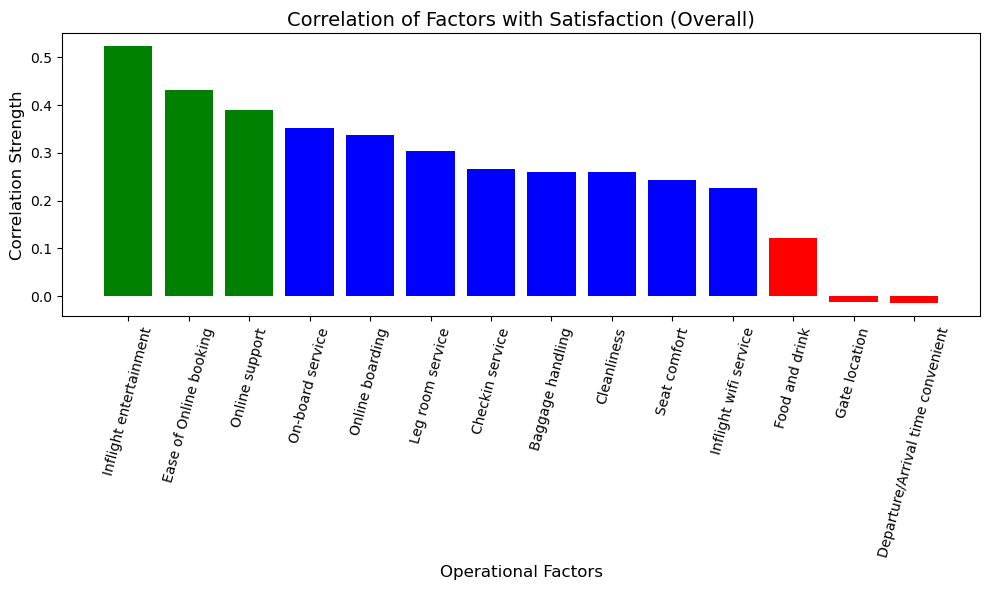

In [120]:
# Graph Correlation of Factors with Satisfaction (Overall)

# Default Bar Colour (Blue)
colours = ['blue'] * len(corr_values)

# Make the First 3 Bars Green
for i in range(3):
    colours[i] = 'green'

# Make the Last 3 Bars Red
for i in range(1, 4):
    colours[-i] = 'red'

plt.figure(figsize = (10, 6))
plt.bar(corr_values.index, corr_values.values, color = colours)
plt.title('Correlation of Factors with Satisfaction (Overall)', fontsize = 14)
plt.xlabel('Operational Factors', fontsize = 12)
plt.ylabel('Correlation Strength', fontsize = 12)
plt.xticks(rotation = 75)
plt.tight_layout()
plt.show()

## Correlation of Factors with Satisfaction - Economy Class

In [121]:
# Correlation Matrix for Economy Class

corr_eco = df_eco[operational_cols + ['satisfaction_num']].corr()

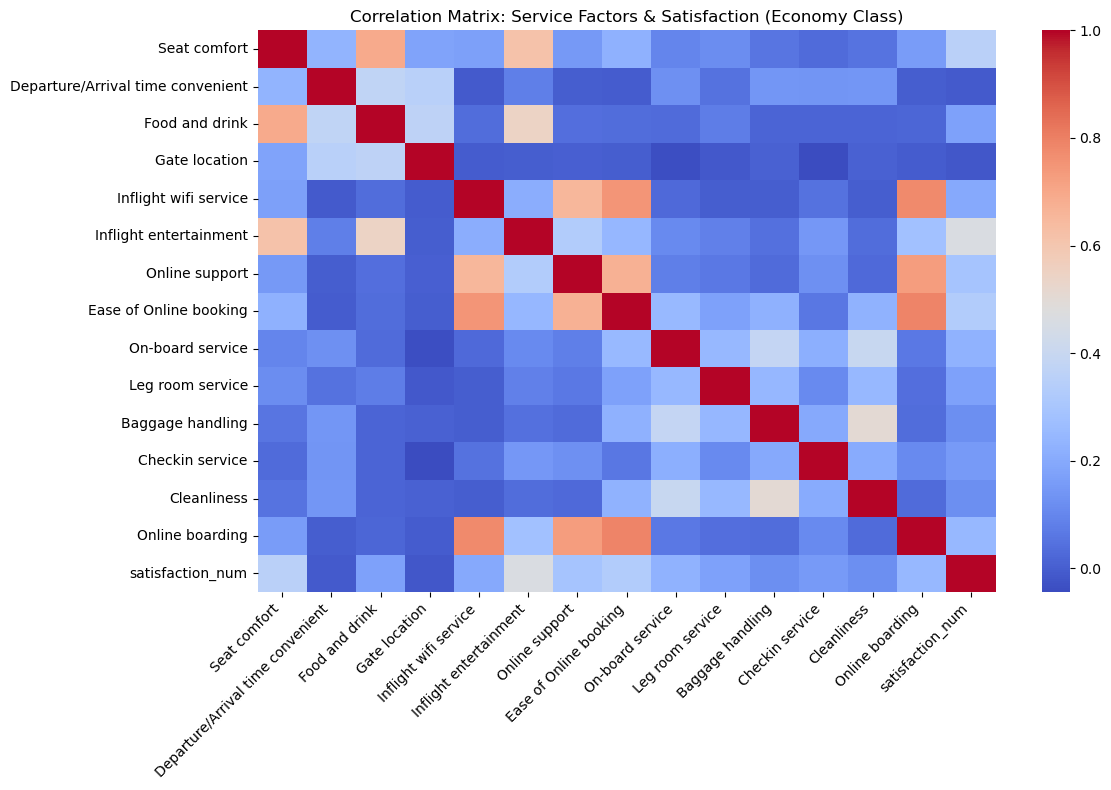

In [122]:
# Plot Economy Correlation Matrix

plt.figure(figsize = (12, 8))
sns.heatmap(corr_eco,
            annot = False,
            cmap = 'coolwarm',
            fmt = ".2f")
plt.title("Correlation Matrix: Service Factors & Satisfaction (Economy Class)")
plt.xticks(rotation = 45, ha = 'right')
plt.yticks(rotation = 0)
plt.tight_layout()
plt.show()

In [123]:
# Calculate Correlation Between each Factor and 'satisfaction_num'

eco_corr = (
    df_eco[operational_cols + ['satisfaction_num']]
    .corr()['satisfaction_num']
    # Remove the correlation of satisfaction with itself
    .drop('satisfaction_num')
)

# Sort Correlation Values from Highest to Lowest
eco_corr = eco_corr.sort_values(ascending = False)

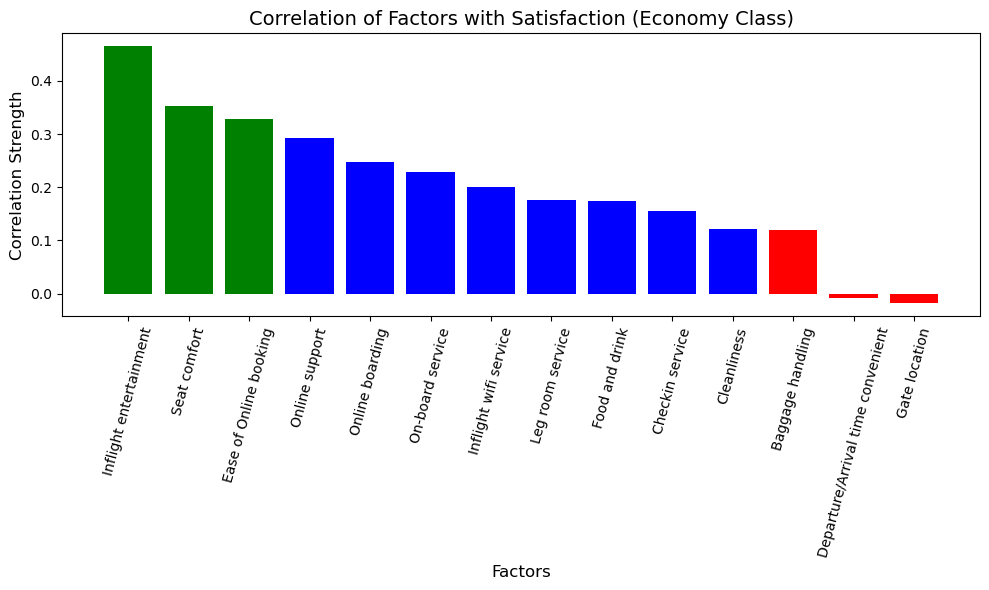

In [124]:
# Graph Correlation of Factors with Satisfaction (Economy)

# Default Bar Colour (Blue)
colours = ['blue'] * len(eco_corr)

# Make the First 3 Bars Green
for i in range(3):
    colours[i] = 'green'

# Make the Last 3 Bars Red
for i in range(1, 4):
    colours[-i] = 'red'

plt.figure(figsize = (10, 6))
plt.bar(eco_corr.index, eco_corr.values, color = colours)
plt.title('Correlation of Factors with Satisfaction (Economy Class)', fontsize = 14)
plt.xlabel('Factors', fontsize = 12)
plt.ylabel('Correlation Strength', fontsize = 12)
plt.xticks(rotation = 75)
plt.tight_layout()
plt.show()

## Correlation of Factors with Satisfaction - Economy-Plus (Eco-Plus) Class

In [125]:
# Correlation Matrix for Eco-Plus Class

corr_ecoplus = df_ecoplus[operational_cols + ['satisfaction_num']].corr()

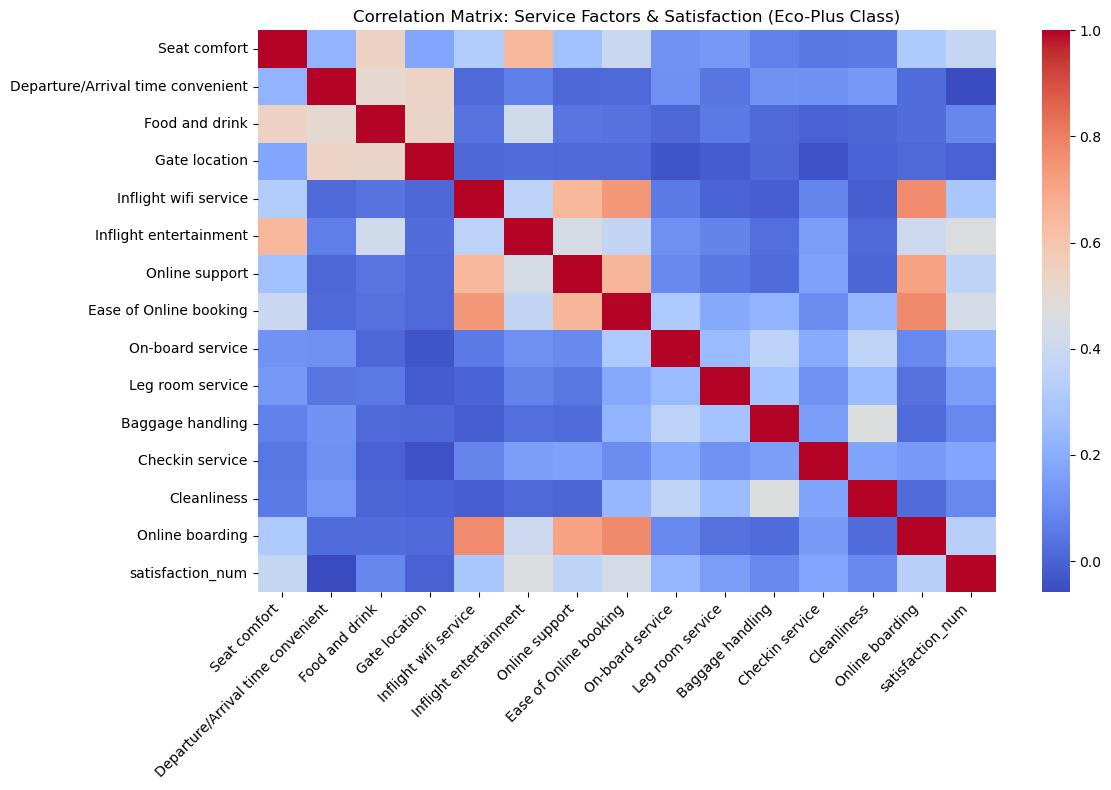

In [126]:
# Plot Eco-Plus Correlation Matrix

plt.figure(figsize=(12, 8))
sns.heatmap(corr_ecoplus,
            annot=False,
            cmap='coolwarm',
            fmt=".2f")
plt.title("Correlation Matrix: Service Factors & Satisfaction (Eco-Plus Class)")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [127]:
# Calculate Correlation Between each Factor and 'satisfaction_num'

ecoplus_corr = (
    df_ecoplus[operational_cols + ['satisfaction_num']]
    .corr()['satisfaction_num']
    # Remove the correlation of satisfaction with itself
    .drop('satisfaction_num')
)

# Sort Correlation Values from Highest to Lowest
ecoplus_corr = ecoplus_corr.sort_values(ascending = False)

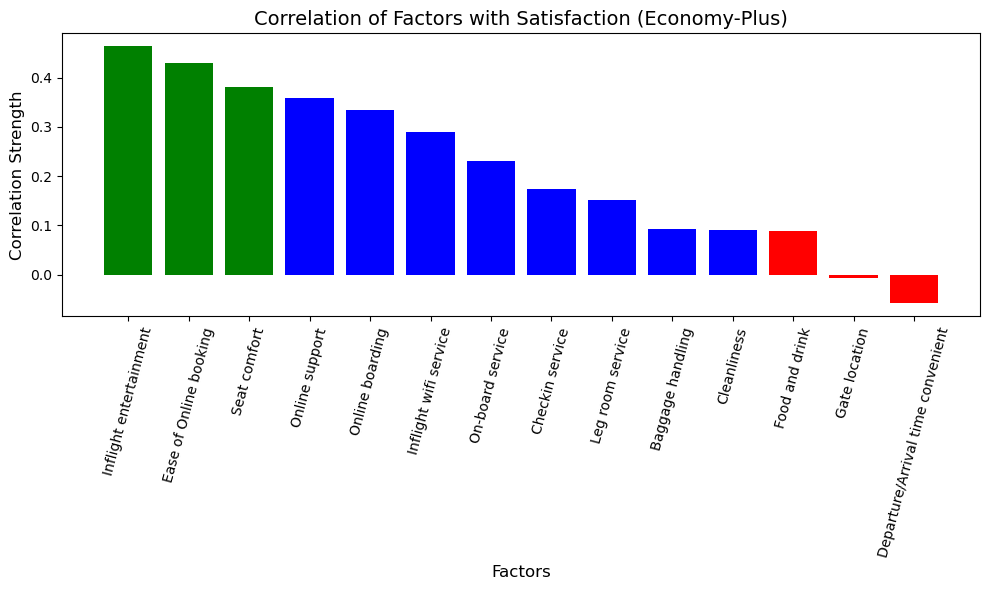

In [128]:
# Graph Correlation of Factors with Satisfaction (Eco-Plus)

# Default Bar Colour (Blue)
colours = ['blue'] * len(ecoplus_corr)

# Make the First 3 Bars Green
for i in range(3):
    colours[i] = 'green'

# Make the Last 3 Bars Red
for i in range(1, 4):
    colours[-i] = 'red'

plt.figure(figsize = (10, 6))
plt.bar(ecoplus_corr.index, ecoplus_corr.values, color = colours)
plt.title('Correlation of Factors with Satisfaction (Economy-Plus)', fontsize = 14)
plt.xlabel('Factors', fontsize = 12)
plt.ylabel('Correlation Strength', fontsize = 12)
plt.xticks(rotation = 75)
plt.tight_layout()
plt.show()

## Correlation of Factors with Satisfaction - Business Class

In [129]:
# Correlation Matrix for Business Class

corr_business = df_business[operational_cols + ['satisfaction_num']].corr()

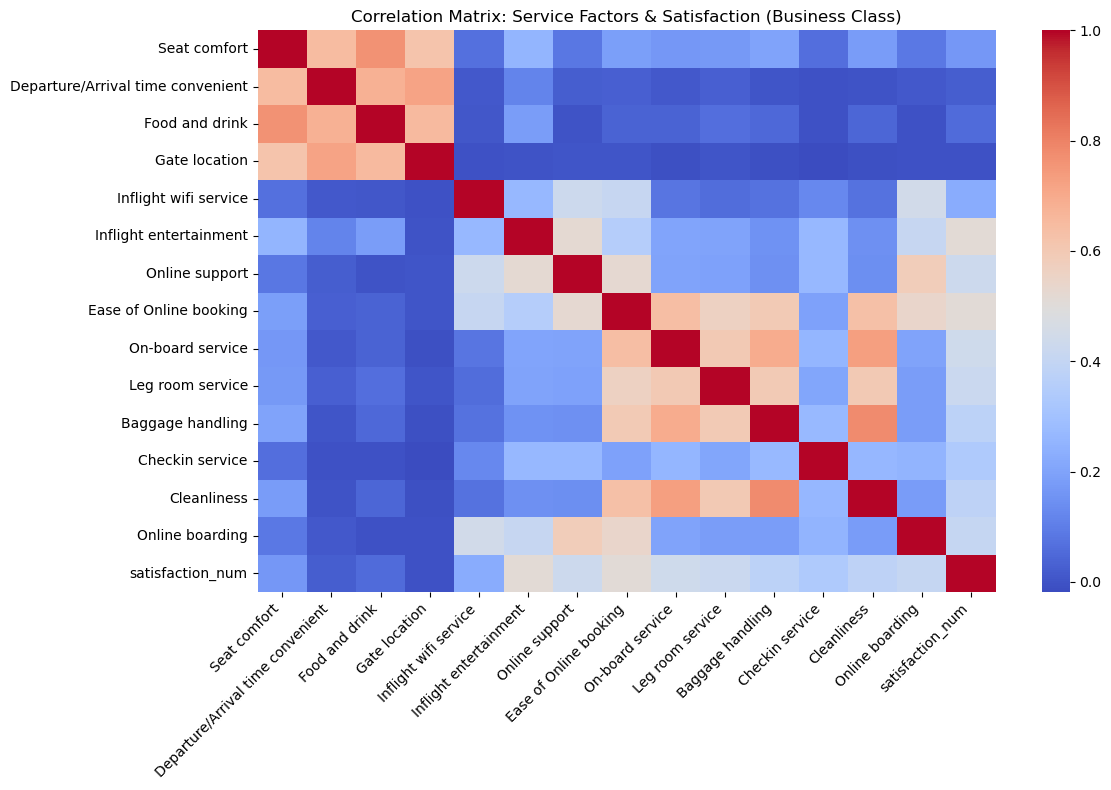

In [130]:
# Plot Business Correlation Matrix

plt.figure(figsize=(12, 8))
sns.heatmap(corr_business,
            annot=False,
            cmap='coolwarm',
            fmt=".2f")
plt.title("Correlation Matrix: Service Factors & Satisfaction (Business Class)")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [131]:
# Calculate Correlation Between each Factor and 'satisfaction_num'

business_corr = (
    df_business[operational_cols + ['satisfaction_num']]
    .corr()['satisfaction_num']
    # Remove the correlation of satisfaction with itself
    .drop('satisfaction_num')
)

# Sort Correlation Values from Highest to Lowest
business_corr = business_corr.sort_values(ascending = False)

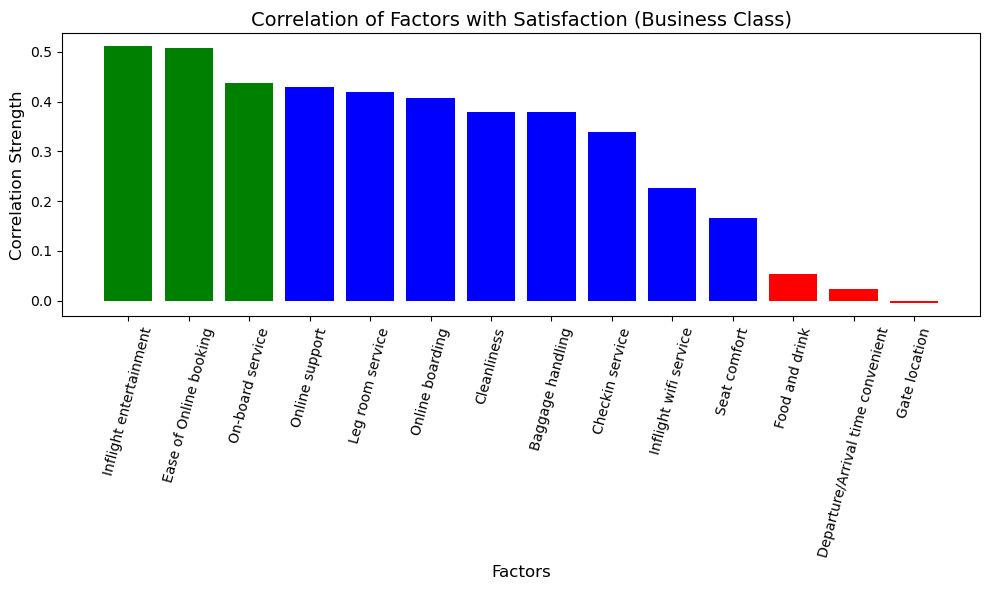

In [132]:
# Graph Correlation of Factors with Satisfaction (Business)

# Default Bar Colour (Blue)
colours = ['blue'] * len(business_corr)

# Make the First 3 Bars Green
for i in range(3):
    colours[i] = 'green'

# Make the Last 3 Bars Red
for i in range(1, 4):
    colours[-i] = 'red'

plt.figure(figsize = (10, 6))
plt.bar(business_corr.index, business_corr.values, color = colours)
plt.title('Correlation of Factors with Satisfaction (Business Class)', fontsize = 14)
plt.xlabel('Factors', fontsize = 12)
plt.ylabel('Correlation Strength', fontsize = 12)
plt.xticks(rotation = 75)
plt.tight_layout()
plt.show()

## Average Rating of Factors - Overall

In [133]:
# Compute Average Rating of each Factor

avg_ratings = df[operational_cols].mean().sort_values(ascending = False)
avg_ratings

Cleanliness                          3.705759
Baggage handling                     3.695673
Online support                       3.519703
Leg room service                     3.485902
Ease of Online booking               3.472105
On-board service                     3.465075
Inflight entertainment               3.383477
Online boarding                      3.352587
Checkin service                      3.340807
Inflight wifi service                3.249130
Departure/Arrival time convenient    2.990645
Gate location                        2.990422
Food and drink                       2.851994
Seat comfort                         2.838597
dtype: float64

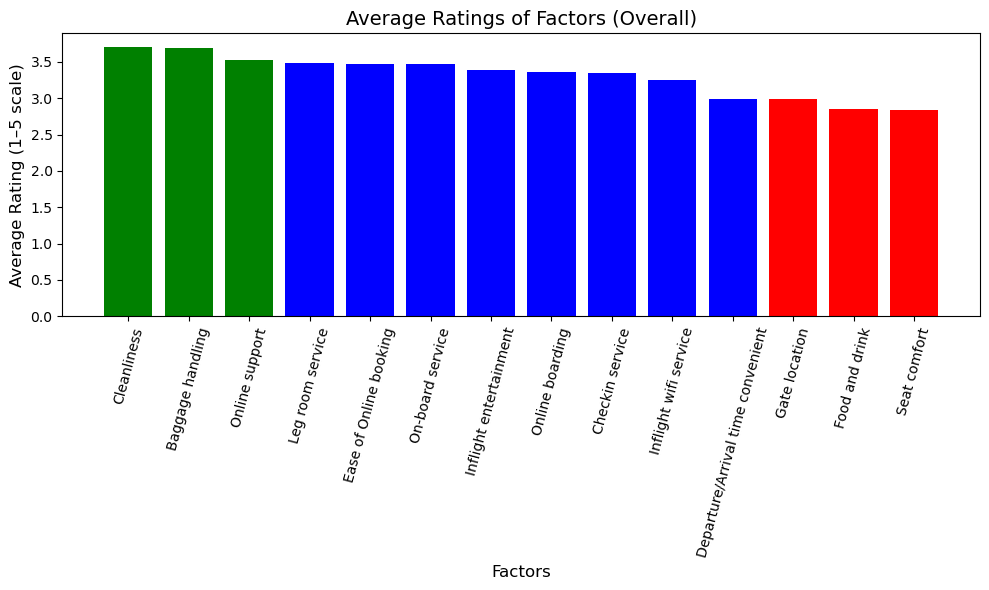

In [134]:
# Plot Overall Average Ratings

# Default Bar Colour (Blue)
colours = ['blue'] * len(avg_ratings)

# Make the First 3 Bars Green
for i in range(3):
    colours[i] = 'green'

# Make the Last 3 Bars Red
for i in range(1, 4):
    colours[-i] = 'red'

plt.figure(figsize=(10, 6))
plt.bar(avg_ratings.index, avg_ratings.values, color = colours)
plt.title('Average Ratings of Factors (Overall)', fontsize=14)
plt.xlabel('Factors', fontsize=12)
plt.ylabel('Average Rating (1–5 scale)', fontsize=12)
plt.xticks(rotation=75)
plt.tight_layout()
plt.show()

In [135]:
# Combine Correlation and Average Rating into One Table

overall_combined = pd.DataFrame({
    'Correlation_with_Satisfaction': corr_values,
    'Average_Rating': avg_ratings
})

In [136]:
# Sort by High Correlation but Low Rating

overall_combined_sorted = overall_combined.sort_values(
    by = ['Correlation_with_Satisfaction', 'Average_Rating'],
    ascending = [False, True]
)
overall_combined_sorted

,Correlation_with_Satisfaction,Average_Rating
Inflight entertainment,0.523496,3.383477
Ease of Online booking,0.431772,3.472105
Online support,0.390143,3.519703
On-board service,0.352047,3.465075
Online boarding,0.338147,3.352587
Leg room service,0.304928,3.485902
Checkin service,0.266179,3.340807
Baggage handling,0.260347,3.695673
Cleanliness,0.259330,3.705759
Seat comfort,0.242384,2.838597


## Average Rating of Factors - Economy Class

In [137]:
# Compute Average Rating of each Factor

eco_avg = df_eco[operational_cols].mean().sort_values(ascending = False)
eco_avg

Cleanliness                          3.581797
Baggage handling                     3.565539
Leg room service                     3.328200
Ease of Online booking               3.305356
Online support                       3.288823
On-board service                     3.269924
Online boarding                      3.227358
Checkin service                      3.186969
Inflight wifi service                3.168310
Departure/Arrival time convenient    3.070932
Inflight entertainment               3.057693
Gate location                        2.996313
Seat comfort                         2.874908
Food and drink                       2.776964
dtype: float64

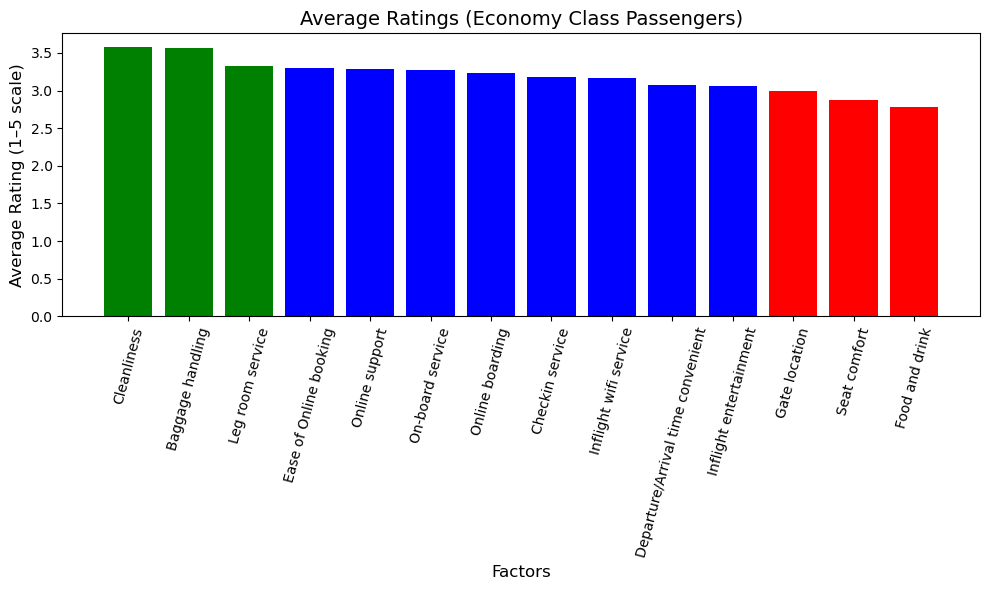

In [138]:
# Plot Overall Average Ratings

# Default Bar Colour (Blue)
colours = ['blue'] * len(eco_avg)

# Make the First 3 Bars Green
for i in range(3):
    colours[i] = 'green'

# Make the Last 3 Bars Red
for i in range(1, 4):
    colours[-i] = 'red'

plt.figure(figsize = (10, 6))
plt.bar(eco_avg.index, eco_avg.values, color = colours)
plt.title('Average Ratings (Economy Class Passengers)', fontsize = 14)
plt.xlabel('Factors', fontsize = 12)
plt.ylabel('Average Rating (1–5 scale)', fontsize = 12)
plt.xticks(rotation = 75)
plt.tight_layout()
plt.show()

In [139]:
# Combine Correlation and Average Rating into One Table

eco_combined = pd.DataFrame({
    'Correlation_with_Satisfaction': eco_corr,
    'Average_Rating': eco_avg
})

In [140]:
# Sort by High Correlation but Low Rating

eco_combined_sorted = eco_combined.sort_values(
    by = ['Correlation_with_Satisfaction', 'Average_Rating'],
    ascending = [False, True]
)
eco_combined_sorted

,Correlation_with_Satisfaction,Average_Rating
Inflight entertainment,0.465207,3.057693
Seat comfort,0.353071,2.874908
Ease of Online booking,0.327414,3.305356
Online support,0.293500,3.288823
Online boarding,0.247940,3.227358
On-board service,0.228957,3.269924
Inflight wifi service,0.199722,3.168310
Leg room service,0.175676,3.328200
Food and drink,0.174170,2.776964
Checkin service,0.155133,3.186969


## Average Rating of Factors - Economy-Plus (Eco-Plus) Class

In [141]:
# Compute Average Rating of each Factor

ecoplus_avg = df_ecoplus[operational_cols].mean().sort_values(ascending = False)
ecoplus_avg

Cleanliness                          3.484752
Baggage handling                     3.458719
Ease of Online booking               3.307619
Online support                       3.291255
Leg room service                     3.280098
Online boarding                      3.217618
Inflight wifi service                3.179046
On-board service                     3.168207
Departure/Arrival time convenient    3.098927
Inflight entertainment               3.098502
Checkin service                      3.070556
Gate location                        2.987887
Seat comfort                         2.935288
Food and drink                       2.822973
dtype: float64

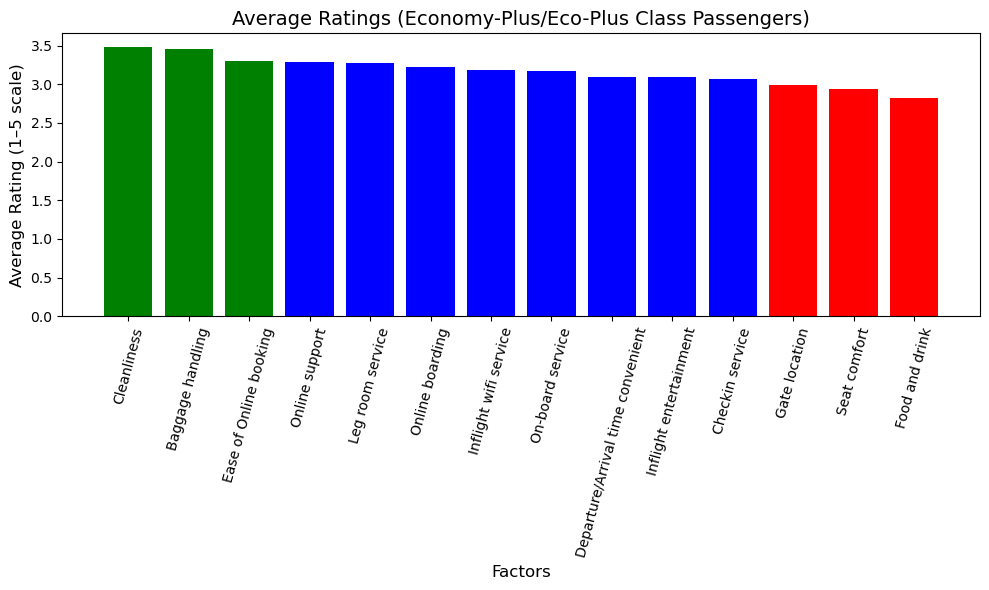

In [142]:
# Plot Overall Average Ratings

# Default Bar Colour (Blue)
colours = ['blue'] * len(ecoplus_avg)

# Make the First 3 Bars Green
for i in range(3):
    colours[i] = 'green'

# Make the Last 3 Bars Red
for i in range(1, 4):
    colours[-i] = 'red'

plt.figure(figsize = (10, 6))
plt.bar(ecoplus_avg.index, ecoplus_avg.values, color = colours)
plt.title('Average Ratings (Economy-Plus/Eco-Plus Class Passengers)', fontsize = 14)
plt.xlabel('Factors', fontsize = 12)
plt.ylabel('Average Rating (1–5 scale)', fontsize = 12)
plt.xticks(rotation = 75)
plt.tight_layout()
plt.show()

In [143]:
# Combine Correlation and Average Rating into One Table

ecoplus_combined = pd.DataFrame({
    'Correlation_with_Satisfaction': ecoplus_corr,
    'Average_Rating': ecoplus_avg
})

In [144]:
# Sort by High Correlation but Low Rating

ecoplus_combined_sorted = ecoplus_combined.sort_values(
    by = ['Correlation_with_Satisfaction', 'Average_Rating'],
    ascending = [False, True]
)
ecoplus_combined_sorted

,Correlation_with_Satisfaction,Average_Rating
Inflight entertainment,0.463620,3.098502
Ease of Online booking,0.429554,3.307619
Seat comfort,0.381233,2.935288
Online support,0.359484,3.291255
Online boarding,0.334565,3.217618
Inflight wifi service,0.290227,3.179046
On-board service,0.231641,3.168207
Checkin service,0.174108,3.070556
Leg room service,0.151516,3.280098
Baggage handling,0.092350,3.458719


## Average Rating of Factors - Business Class

In [145]:
# Compute Average Rating of each Factor

business_avg = df_business[operational_cols].mean().sort_values(ascending = False)
business_avg

Cleanliness                          3.855502
Baggage handling                     3.853620
Online support                       3.770866
Inflight entertainment               3.732223
On-board service                     3.693082
Leg room service                     3.664994
Ease of Online booking               3.653427
Checkin service                      3.526030
Online boarding                      3.490492
Inflight wifi service                3.335553
Gate location                        2.985280
Food and drink                       2.926770
Departure/Arrival time convenient    2.898938
Seat comfort                         2.789897
dtype: float64

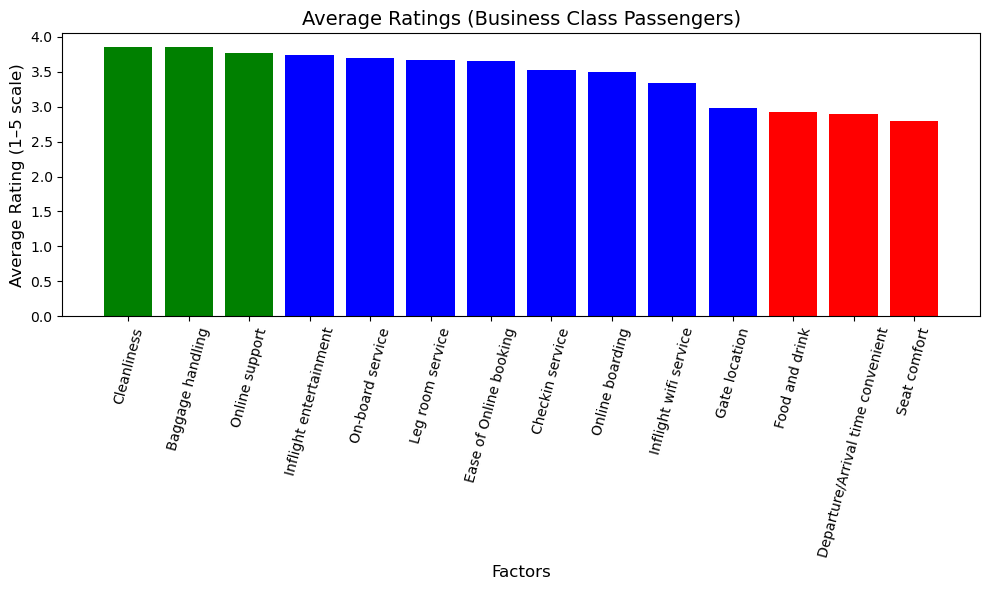

In [146]:
# Plot Overall Average Ratings

# Default Bar Colour (Blue)
colours = ['blue'] * len(business_avg)

# Make the First 3 Bars Green
for i in range(3):
    colours[i] = 'green'

# Make the Last 3 Bars Red
for i in range(1, 4):
    colours[-i] = 'red'

plt.figure(figsize = (10, 6))
plt.bar(business_avg.index, business_avg.values, color = colours)
plt.title('Average Ratings (Business Class Passengers)', fontsize = 14)
plt.xlabel('Factors', fontsize = 12)
plt.ylabel('Average Rating (1–5 scale)', fontsize = 12)
plt.xticks(rotation = 75)
plt.tight_layout()
plt.show()

In [147]:
# Combine Correlation and Average Rating into One Table

business_combined = pd.DataFrame({
    'Correlation_with_Satisfaction': business_corr,
    'Average_Rating': business_avg
})

In [148]:
# Sort by High Correlation but Low Rating

business_combined_sorted = business_combined.sort_values(
    by = ['Correlation_with_Satisfaction', 'Average_Rating'],
    ascending = [False, True]
)
business_combined_sorted

,Correlation_with_Satisfaction,Average_Rating
Inflight entertainment,0.511332,3.732223
Ease of Online booking,0.508167,3.653427
On-board service,0.436455,3.693082
Online support,0.429073,3.770866
Leg room service,0.420039,3.664994
Online boarding,0.406408,3.490492
Cleanliness,0.380069,3.855502
Baggage handling,0.378632,3.853620
Checkin service,0.338971,3.526030
Inflight wifi service,0.226748,3.335553


## Decision Tree Analysis

In [149]:
# Factors used to Predict Satisfaction
X = df[operational_cols]

# Select the Satisfaction Variable (1-> satisfied, 0 -> dissatisfied) as the Target (y)
y = df['satisfaction_num']

In [157]:
# Split the Data into Training and Testing Sets

from sklearn.model_selection import train_test_split

# 25% of the Data is used for Testing, 75% for Training
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.25, random_state = 42
)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

Training set size: (97410, 14)
Test set size: (32470, 14)


In [151]:
# Create a Decision Tree Model

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(
    criterion = 'gini',
    max_depth = 5,         
    min_samples_leaf = 50,  
    random_state = 42
)

# Train the Model on the Training Data
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=50, random_state=42)

In [152]:
from sklearn.metrics import accuracy_score, classification_report

# Use the Trained Model to Predict Satisfaction on the Test Data
y_pred = dt.predict(X_test)

# Check if Model Predicts Correctly
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Decision Tree Accuracy: 0.8725900831536804

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.86     14608
           1       0.90      0.86      0.88     17862

    accuracy                           0.87     32470
   macro avg       0.87      0.87      0.87     32470
weighted avg       0.87      0.87      0.87     32470



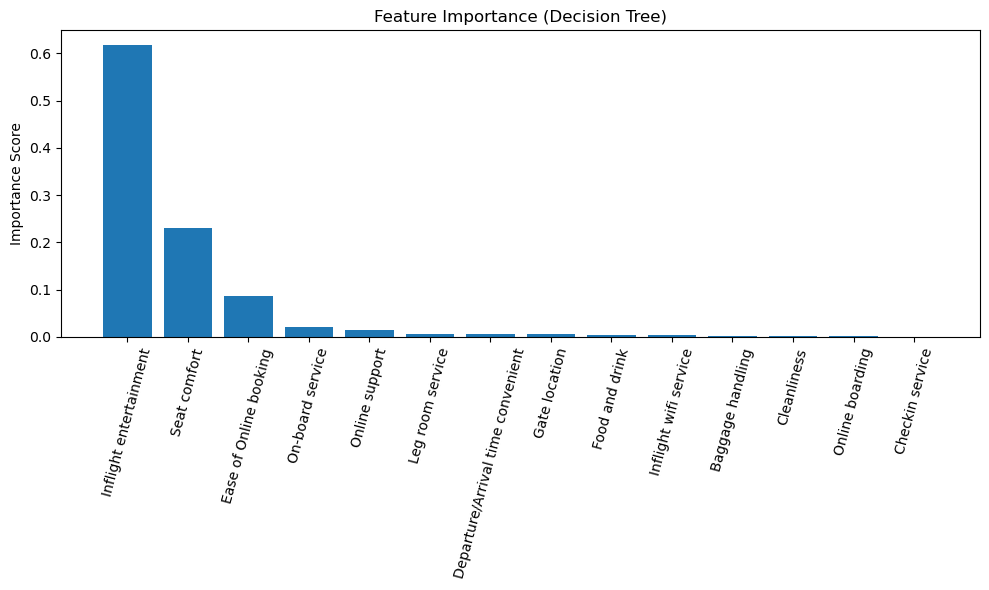

In [155]:
import numpy as np

# Get the Importance Score for Each Feature from the Decision Tree
importance = dt.feature_importances_

# Sort Features by Importance (from highest to lowest)
indices = np.argsort(importance)[::-1]

plt.figure(figsize = (10, 6))
plt.bar(np.array(operational_cols)[indices], importance[indices])
plt.xticks(rotation = 75)
plt.title("Feature Importance (Decision Tree)")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()

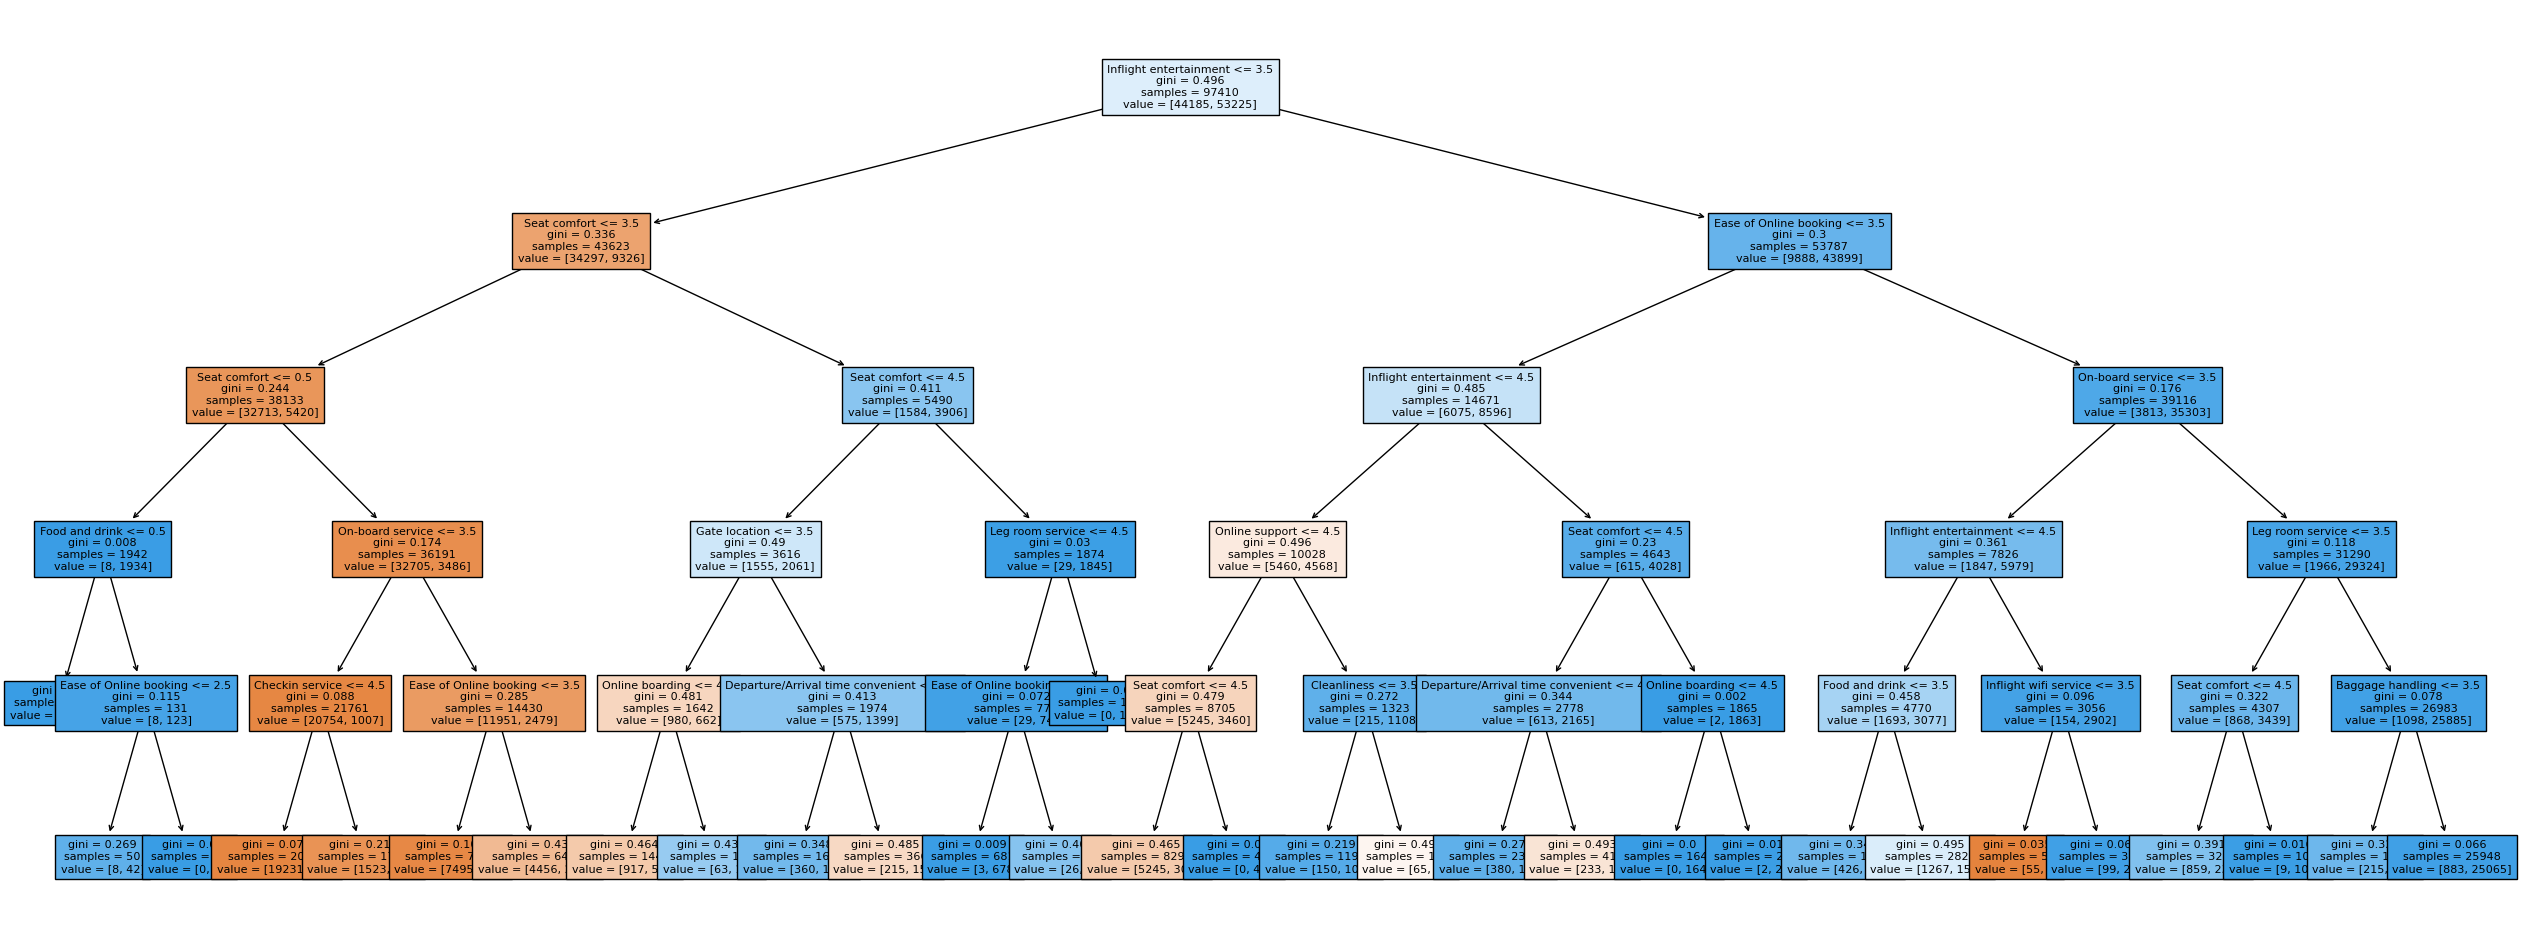

In [159]:
from sklearn.tree import plot_tree

# Visualize the Decision Tree Structure
plt.figure(figsize = (32, 12))
plot_tree(dt, 
          feature_names = operational_cols, 
          filled = True, 
          fontsize = 8
)
plt.show()